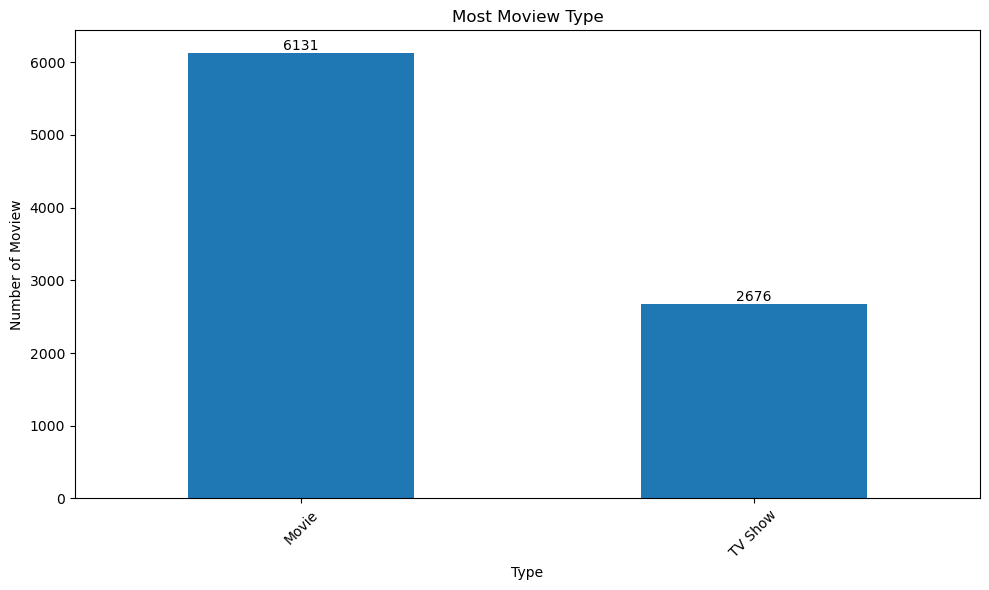

In [4]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Most Moview Type
df = pd.read_csv("netflix_titles.csv")

# Dataset
top_context = df['type'].value_counts()
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Most Moview Type")
plt.xlabel("Type")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

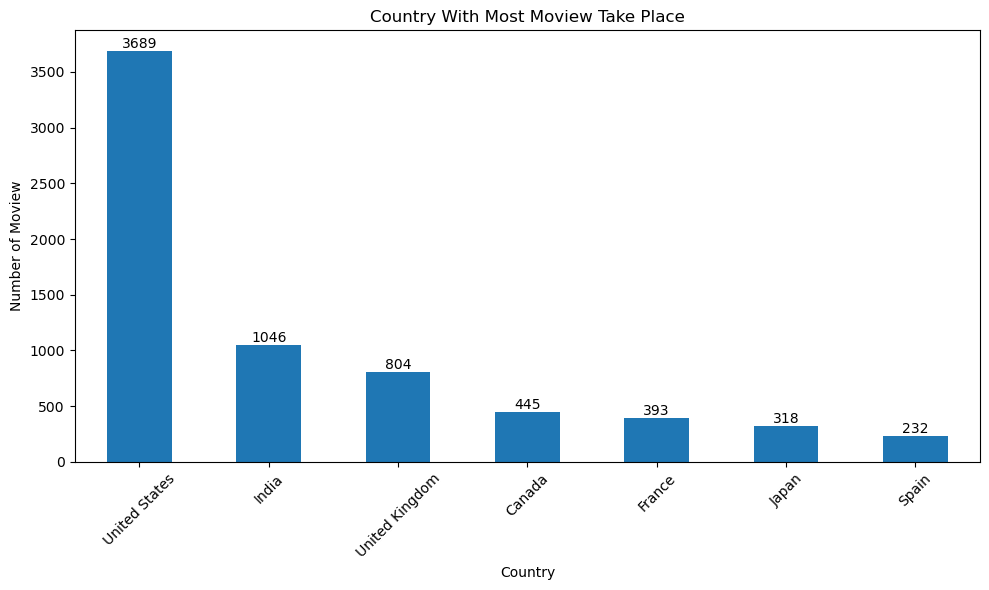

In [2]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Country With Most Moview Take Place
df = pd.read_csv("netflix_titles.csv")

# Dataset
country_list = df['country'].dropna().str.split(', ')
country_counts = pd.Series([country for sublist in country_list for country in sublist])
top_context = country_counts.value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Country With Most Moview Take Place")
plt.xlabel("Country")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

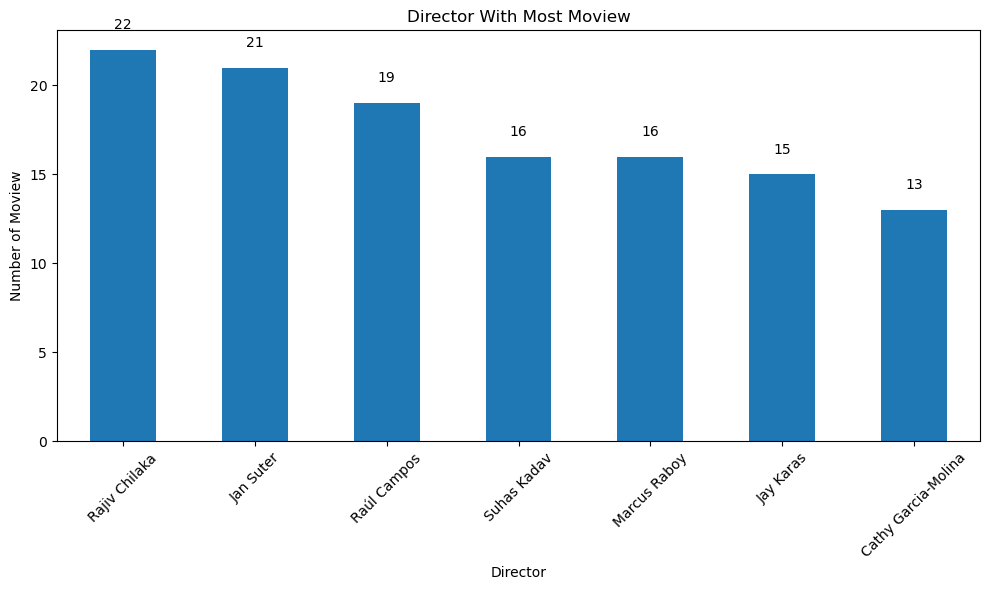

In [2]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Director With Most Moview 
df = pd.read_csv("netflix_titles.csv")

# Dataset
country_list = df['director'].dropna().str.split(', ')
country_counts = pd.Series([country for sublist in country_list for country in sublist])
top_context = country_counts.value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Director With Most Moview")
plt.xlabel("Director")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

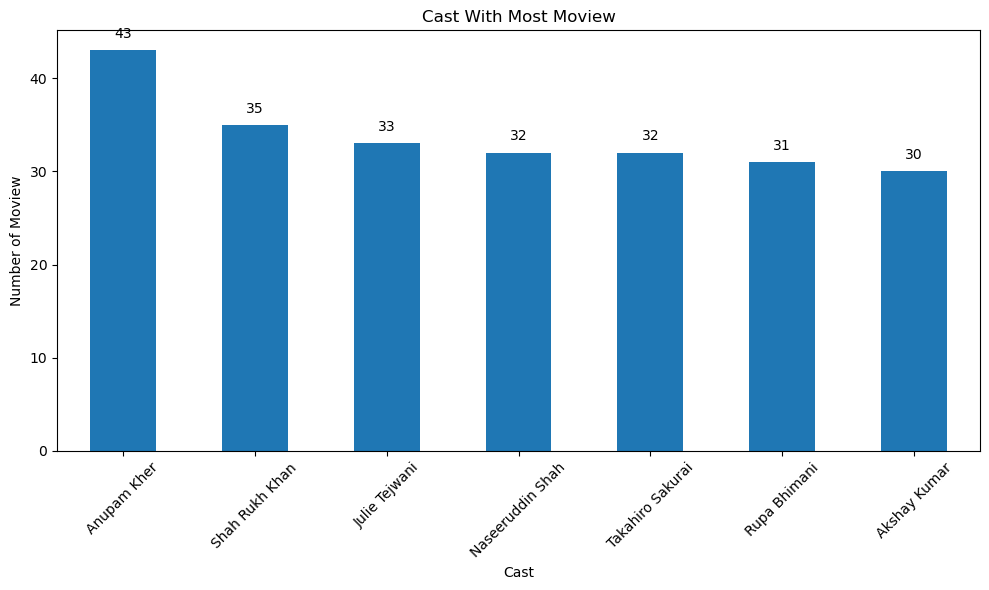

In [4]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Cast With Most Moview 
df = pd.read_csv("netflix_titles.csv")

# Dataset
country_list = df['cast'].dropna().str.split(', ')
country_counts = pd.Series([country for sublist in country_list for country in sublist])
top_context = country_counts.value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Cast With Most Moview")
plt.xlabel("Cast")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

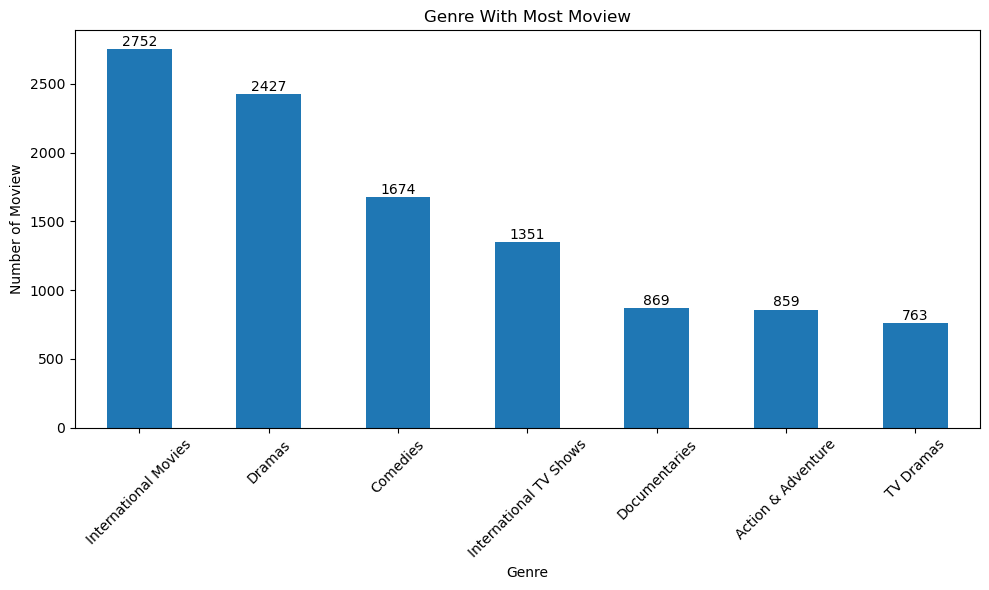

In [4]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Genre With Most Moview 
df = pd.read_csv("netflix_titles.csv")

# Dataset
country_list = df['listed_in'].dropna().str.split(', ')
country_counts = pd.Series([country for sublist in country_list for country in sublist])
top_context = country_counts.value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Genre With Most Moview")
plt.xlabel("Genre")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

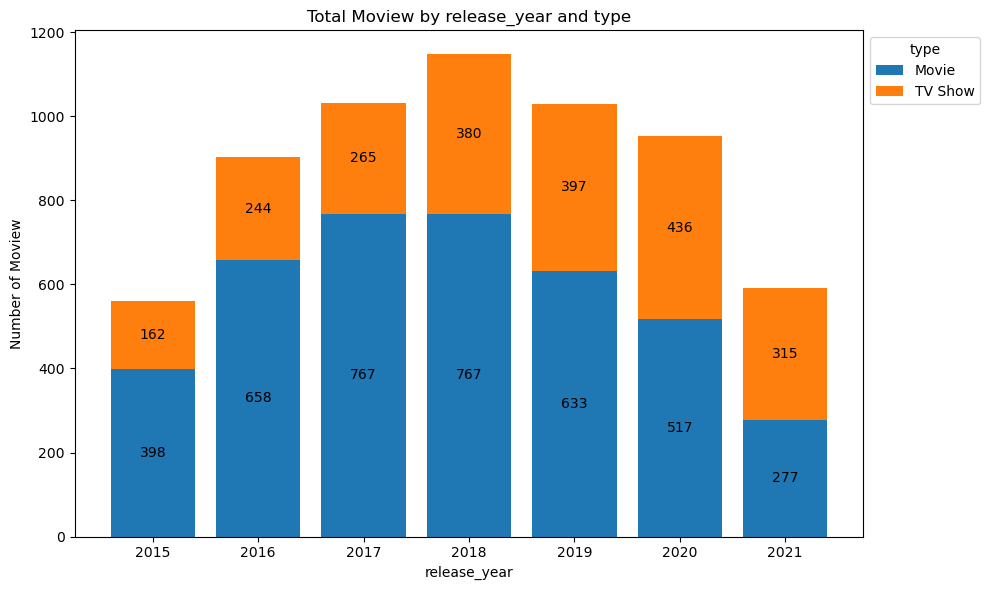

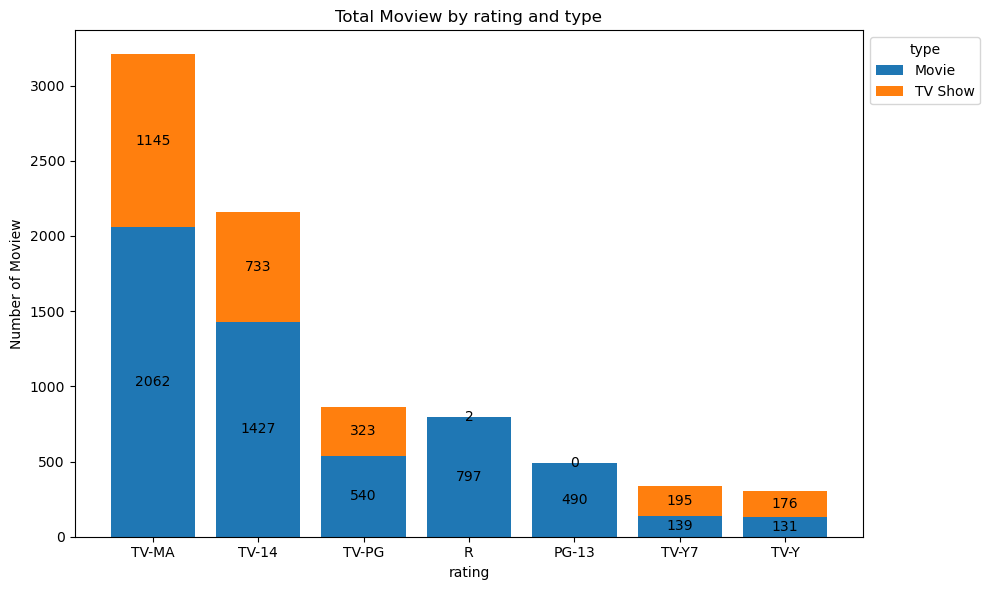

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("netflix_titles.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Most Context and Grouping for Nonconditional Data
target_col = [
    { 'count_col' : 'release_year', 'group_col' : 'type' },
    { 'count_col' : 'rating', 'group_col' : 'type' },
]

for dt in target_col:
    count_col = dt['count_col']
    group_col = dt['group_col']
    
    # Dataset
    context_group_counts = df.groupby([count_col, group_col]).size().reset_index(name='Count')
    stacked_data = context_group_counts.pivot(index=count_col, columns=group_col, values='Count').fillna(0)
    
    # Ordering
    stacked_data['Total'] = stacked_data.sum(axis=1)
    stacked_data = stacked_data.sort_values(by='Total', ascending=False).head(7)
    categories = stacked_data.columns[:-1] 
    counts = stacked_data[categories].values 
    
    # Plotting
    context = stacked_data.index
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = np.zeros(len(context))
    
    # Plot each group_col as stack
    for group_col_index, group in enumerate(categories):
        p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
        bottom += counts[:, group_col_index]
        ax.bar_label(p, label_type='center', fmt='%d')
    
    # Customizing the plot
    ax.set_title(f'Total Moview by {count_col} and {group_col}')
    ax.set_xlabel(count_col)
    ax.set_ylabel('Number of Moview')
    ax.legend(title=group_col, bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    print("\n")

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("netflix_titles.csv")

# Split country
df["country"] = df["country"].dropna().str.split(", ")

# Explode country column so each country has its own row
df = df.explode("country").dropna()

# Dictionary of continents
continent = {
    "Asia": [
        "India", "China", "Japan", "South Korea", "Singapore", "Turkey",
        "Hong Kong", "Russia", "Nepal", "Israel", "Taiwan", "Saudi Arabia",
        "Thailand", "Indonesia", "Malaysia", "Vietnam", "Lebanon", "Syria",
        "Philippines", "United Arab Emirates", "Qatar", "Palestine",
        "Bangladesh", "Pakistan", "Iraq", "Iran", "Georgia", "Armenia",
        "Mongolia", "Sri Lanka", "Azerbaijan", "Kazakhstan", "Afghanistan",
        "Jordan", "Kuwait", "Cambodia"
    ],
    "Europe": [
        "United Kingdom", "Germany", "Czech Republic", "Turkey", "France",
        "Finland", "Spain", "Belgium", "Italy", "Romania", "Russia",
        "Ireland", "Greece", "Switzerland", "Bulgaria", "Poland", "Denmark",
        "Netherlands", "Hungary", "Sweden", "Norway", "Austria", "Luxembourg",
        "Portugal", "Serbia", "Malta", "Belarus", "Albania", "Slovakia",
        "Ukraine", "Latvia", "Liechtenstein", "Slovenia", "Lithuania",
        "Montenegro", "Vatican City", "West Germany", "East Germany",
        "Soviet Union", "Croatia", "Iceland", "Poland"
    ],
    "North America": [
        "United States", "Canada", "Mexico", "Cayman Islands", "Puerto Rico",
        "Guatemala", "Bermuda", "Bahamas", "Cuba", "Nicaragua", "Dominican Republic",
        "Jamaica", "Panama"
    ],
    "South America": [
        "Argentina", "Venezuela", "Brazil", "Colombia", "Uruguay", "Chile",
        "Peru", "Paraguay", "Ecuador"
    ],
    "Oceania": [
        "Australia", "New Zealand", "Samoa"
    ],
    "Africa": [
        "South Africa", "Ghana", "Burkina Faso", "Ethiopia", "Nigeria",
        "Algeria", "Egypt", "Cameroon", "Mauritius", "Kenya", "Senegal",
        "Namibia", "Angola", "Mozambique", "Zimbabwe", "Botswana",
        "Somalia", "Sudan", "Uganda", "Morocco", "Malawi"
    ]
}

# Function to assign continent
def assign_continent(country):
    for cont, countries in continent.items():
        if country in countries:
            return cont
    return "Unknown"

# Assign continent to each country
df["continent"] = df["country"].apply(assign_continent)

# List unregistered countries
unknown_region = df[df["continent"] == "Unknown"]
print(unknown_region[["country", "continent"]])

              country continent
365                     Unknown
1192  United Kingdom,   Unknown
2224        Cambodia,   Unknown
7007          Poland,   Unknown


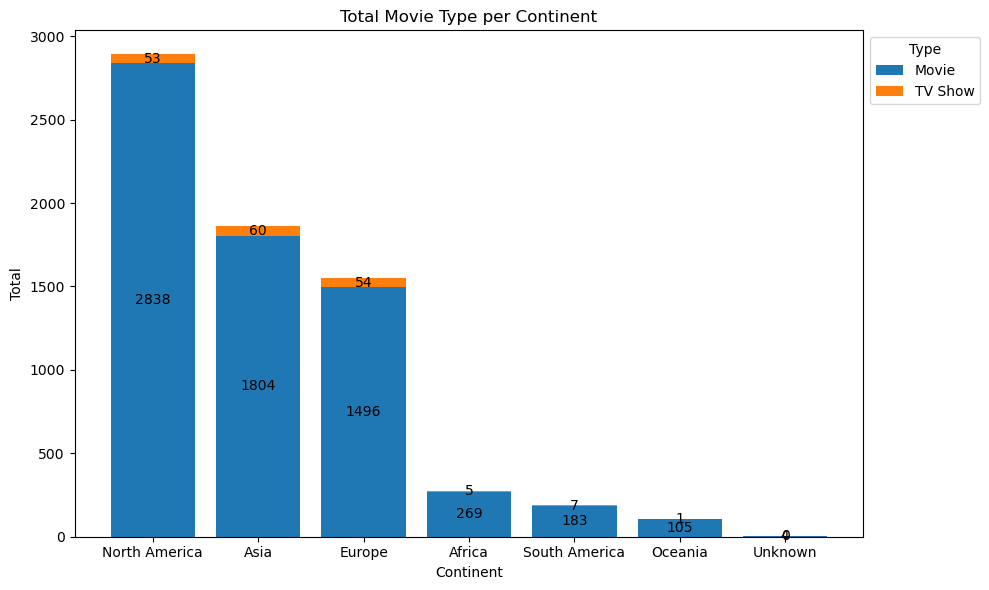

In [85]:
# Exploratory Data Analysis (EDA) - Stacked Bar Chart Movie Type Comparison per Continent
# Dataset
context_group_counts = df.groupby(['continent', 'type'], observed=False).size().reset_index(name='Count')
stacked_data = context_group_counts.pivot(index='continent', columns='type', values='Count').fillna(0)

# Ordering
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False)
categories = stacked_data.columns[:-1] 
counts = stacked_data[categories].values 

# Plotting
context = stacked_data.index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(context))

# Plot each group_col as stack
for group_col_index, group in enumerate(categories):
    p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
    bottom += counts[:, group_col_index]
    ax.bar_label(p, label_type='center', fmt='%d')

# Bar Chart
ax.set_title(f'Total Movie Type per Continent')
ax.set_xlabel('Continent')
ax.set_ylabel('Total')
ax.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [121]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
df = pd.read_csv("netflix_titles.csv")

# Clean val
df['duration'] = df['duration'].str.replace("Seasons", "Season", regex=False)

# Dictionaries of Category
duration_categories = {
    "Short Film": [d for d in df["duration"].dropna() if "min" in d and int(d.split(" ")[0]) < 60],
    "Feature Film": [d for d in df["duration"].dropna() if "min" in d and 30 <= int(d.split(" ")[0]) <= 110],
    "Epic Film": [d for d in df["duration"].dropna() if "min" in d and int(d.split(" ")[0]) > 110],
    "Mini-Series": [d for d in df["duration"].dropna() if "Season" in d and int(d.split(" ")[0]) == 1],
    "TV Series": [d for d in df["duration"].dropna() if "Season" in d and int(d.split(" ")[0]) > 1]
}

# Function to assign duration category
def assign_duration_category(duration):
    for dur, durations in duration_categories.items():
        if duration in durations:
            return dur
    return "Unknown"

# Assign duration category to each duration
df["duration_category"] = df["duration"].apply(assign_duration_category)

# List unregistered countries
unknown_duration_category = df[df["duration_category"] == "Unknown"]
print(unknown_duration_category[["duration", "duration_category"]])

     duration duration_category
5541      NaN           Unknown
5794      NaN           Unknown
5813      NaN           Unknown


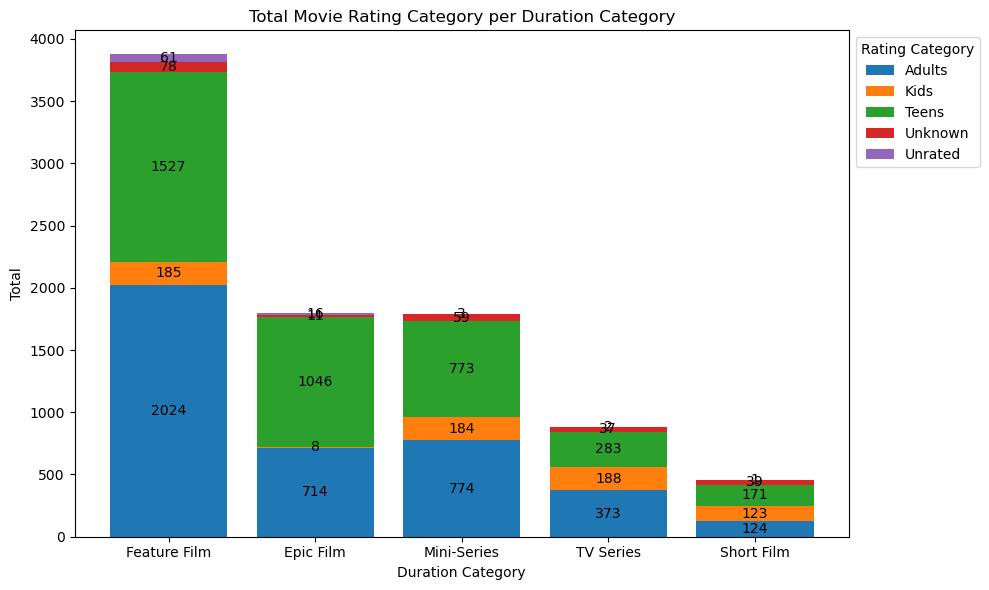

In [123]:
# Exploratory Data Analysis (EDA) - Stacked Bar Chart Movie Rating Comparison per Duration Category
# Clean Miss Rating
df = df[~df['rating'].str.contains('min', na=False)]

# Group Rating
rating_groups = {
    "Kids": ["TV-Y", "TV-Y7", "TV-Y7-FV", "G"],
    "Teens": ["PG", "PG-13", "TV-PG", "TV-14"],
    "Adults": ["R", "NC-17", "TV-MA"],
    "Unrated": ["NR", "UR", None] 
}
def categorize_rating(rating):
    for category, ratings in rating_groups.items():
        if rating in ratings:
            return category
    return "Unknown"

df["rating_category"] = df["rating"].apply(categorize_rating)

context_group_counts = df.groupby(['duration_category', 'rating_category'], observed=False).size().reset_index(name='Count')
stacked_data = context_group_counts.pivot(index='duration_category', columns='rating_category', values='Count').fillna(0)

# Ordering
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False)
categories = stacked_data.columns[:-1] 
counts = stacked_data[categories].values 

# Plotting
context = stacked_data.index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(context))

# Plot each group_col as stack
for group_col_index, group in enumerate(categories):
    p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
    bottom += counts[:, group_col_index]
    ax.bar_label(p, label_type='center', fmt='%d')

# Bar Chart
ax.set_title(f'Total Movie Rating Category per Duration Category')
ax.set_xlabel('Duration Category')
ax.set_ylabel('Total')
ax.legend(title='Rating Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()